In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('AirQuality_Clean_Normalized.csv', sep=';', decimal=',', encoding='utf-8', index_col=0, parse_dates=True)

In [2]:
X = df[['NO2(GT)']]
y = df['CO(GT)']
split_index = int(len(df)*0.8)
X_train, X_val = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_val = y.iloc[:split_index], y.iloc[split_index:]

In [3]:
print('NaNs en X_train:', np.isnan(X_train).any())
print('NaNs en X_val:  ', np.isnan(X_val).any())
print('NaNs en y_train:', np.isnan(y_train).any())

NaNs en X_train: NO2(GT)    False
dtype: bool
NaNs en X_val:   NO2(GT)    False
dtype: bool
NaNs en y_train: False


In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')   # puede ser 'median' o 'most_frequent'
X_train = imputer.fit_transform(X_train)
X_val   = imputer.transform(X_val)

In [5]:
print('NaNs en y_train:', np.isnan(y_train).sum())
print('NaNs en y_val:  ', np.isnan(y_val).sum())

NaNs en y_train: 0
NaNs en y_val:   0


In [6]:
mask = ~np.isnan(y_train)
X_train = X_train[mask]
y_train = y_train[mask]

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

In [8]:
for name, v in [('y_train', y_train),
                ('y_train_pred', y_train_pred),
                ('y_val', y_val),
                ('y_val_pred', y_val_pred)]:
    print(f'{name:12} -> NaNs: {np.isnan(v).sum()}')

y_train      -> NaNs: 0
y_train_pred -> NaNs: 0
y_val        -> NaNs: 0
y_val_pred   -> NaNs: 0


In [9]:
# 1. máscara de filas válidas
mask_val = ~np.isnan(y_val)

In [10]:
# 2. limpiar
y_val_clean      = y_val[mask_val]
y_val_pred_clean = y_val_pred[mask_val]

In [11]:
# 3. métricas
print("R² validación:", r2_score(y_val_clean, y_val_pred_clean))
print("RMSE validación:", np.sqrt(mean_squared_error(y_val_clean, y_val_pred_clean)))

R² validación: -0.5626984241097353
RMSE validación: 0.1463109796018396


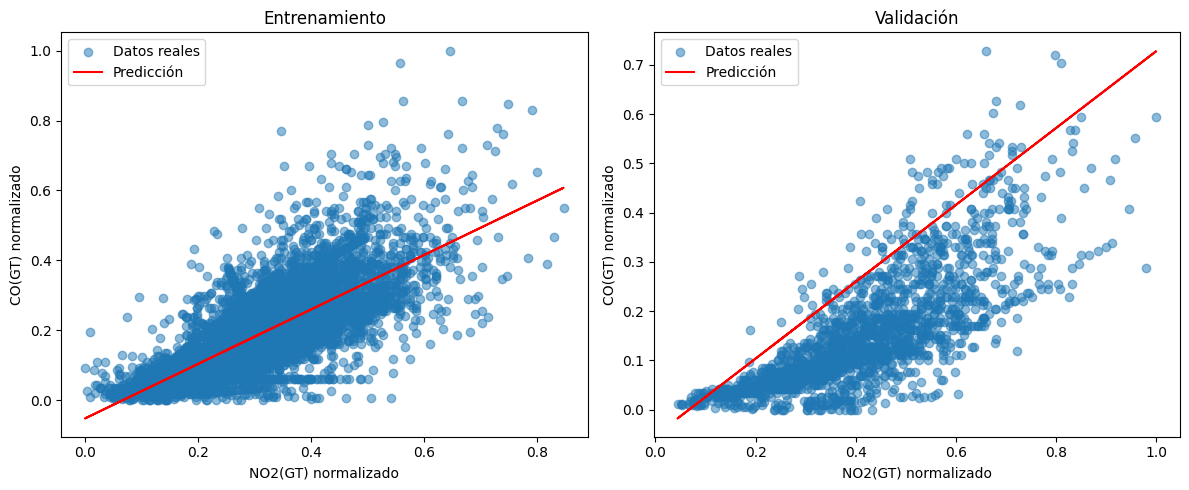

In [12]:
plt.figure(figsize=(12,5))
# Entrenamiento
plt.subplot(1,2,1)
plt.scatter(X_train, y_train, alpha=0.5, label='Datos reales')
plt.plot(X_train, y_train_pred, color='red', label='Predicción')
plt.title('Entrenamiento')
plt.xlabel('NO2(GT) normalizado')
plt.ylabel('CO(GT) normalizado')
plt.legend()
# Validación
plt.subplot(1,2,2)
plt.scatter(X_val, y_val, alpha=0.5, label='Datos reales')
plt.plot(X_val, y_val_pred, color='red', label='Predicción')
plt.title('Validación')
plt.xlabel('NO2(GT) normalizado')
plt.ylabel('CO(GT) normalizado')
plt.legend()
plt.tight_layout()
plt.show()